In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [ ]:
drive.mount('/content/drive')
DATASET_DIRECTORY = '/content/drive/MyDrive/dataset/'
!ls /content/drive/MyDrive/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Merged01.csv  Merged02.csv  Merged03.csv  Merged04.csv	Merged05.csv


In [ ]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]

In [ ]:
X_columns = [
     'Header_Length', 'Protocol Type','Time_To_Live',
       'Rate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'rst_count',
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number','Variance',
]
y_column = 'Label'

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [ ]:
# Iterate through the training datasets
for train_set in tqdm(training_sets):
    # Read the CSV file
    df = pd.read_csv(DATASET_DIRECTORY + train_set)

    # Check for NaN or infinite values and handle them
    if df[X_columns].isna().sum().sum() > 0:
        print(f"Missing values found in {train_set}, filling with mean...")
        df[X_columns] = df[X_columns].fillna(df[X_columns].mean())

    # Replace infinite values with a large number (e.g., max float value)
    df[X_columns] = df[X_columns].replace([np.inf, -np.inf], np.nan)

    if df[X_columns].isna().sum().sum() > 0:
        print(f"NaN values after replacement in {train_set}, filling with mean...")
        df[X_columns] = df[X_columns].fillna(df[X_columns].mean())

    scaler.fit(df[X_columns])


  0%|          | 0/4 [00:00<?, ?it/s]

Missing values found in Merged01.csv, filling with mean...
NaN values after replacement in Merged01.csv, filling with mean...


 25%|██▌       | 1/4 [00:12<00:36, 12.01s/it]

Missing values found in Merged02.csv, filling with mean...
NaN values after replacement in Merged02.csv, filling with mean...


 50%|█████     | 2/4 [00:26<00:26, 13.24s/it]

Missing values found in Merged03.csv, filling with mean...
NaN values after replacement in Merged03.csv, filling with mean...


 75%|███████▌  | 3/4 [00:33<00:10, 10.61s/it]

Missing values found in Merged04.csv, filling with mean...
NaN values after replacement in Merged04.csv, filling with mean...


100%|██████████| 4/4 [00:40<00:00, 10.04s/it]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ML_models = [LogisticRegression(n_jobs=-1)]
ML_names = ["LogisticRegression"]

# Initialize model and scaler
scaler = StandardScaler()

# Iterate through training sets
for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)

    # Clean up column names (remove spaces)
    d.columns = d.columns.str.strip()

    if d[X_columns].isna().sum().sum() > 0:
        print(f"Missing values found in {train_set}, filling with mean...")
        d[X_columns] = d[X_columns].fillna(d[X_columns].mean())

    d[X_columns] = d[X_columns].replace([np.inf, -np.inf], np.nan)
    if d[X_columns].isna().sum().sum() > 0:
        print(f"NaN values after replacement in {train_set}, filling with mean...")
        d[X_columns] = d[X_columns].fillna(d[X_columns].mean())

    scaler.fit(d[X_columns])
    d[X_columns] = scaler.transform(d[X_columns])

    X_train = d[X_columns]
    y_train = d[y_column]

    for model in ML_models:
        model.fit(X_train, y_train)

    del d


  0%|          | 0/4 [00:00<?, ?it/s]

Missing values found in Merged01.csv, filling with mean...
NaN values after replacement in Merged01.csv, filling with mean...


 25%|██▌       | 1/4 [01:54<05:43, 114.50s/it]

Missing values found in Merged02.csv, filling with mean...
NaN values after replacement in Merged02.csv, filling with mean...


 50%|█████     | 2/4 [03:56<03:58, 119.17s/it]

Missing values found in Merged03.csv, filling with mean...
NaN values after replacement in Merged03.csv, filling with mean...


 75%|███████▌  | 3/4 [05:50<01:56, 116.51s/it]

Missing values found in Merged04.csv, filling with mean...
NaN values after replacement in Merged04.csv, filling with mean...


100%|██████████| 4/4 [07:36<00:00, 114.19s/it]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_test = []
preds = {i: [] for i in range(len(ML_models))}

# Iterate through test sets
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)

    d_test.columns = d_test.columns.str.strip()

    if d_test[X_columns].isna().sum().sum() > 0:
        print(f"Missing values found in {test_set}, filling with mean...")
        d_test[X_columns] = d_test[X_columns].fillna(d_test[X_columns].mean())

    d_test[X_columns] = d_test[X_columns].replace([np.inf, -np.inf], np.nan)
    if d_test[X_columns].isna().sum().sum() > 0:
        print(f"NaN values after replacement in {test_set}, filling with mean...")
        d_test[X_columns] = d_test[X_columns].fillna(d_test[X_columns].mean())

    d_test[X_columns] = scaler.transform(d_test[X_columns])

    y_test += list(d_test[y_column].values)

    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] += y_pred

    del d_test


  0%|          | 0/1 [00:00<?, ?it/s]

Missing values found in Merged05.csv, filling with mean...
NaN values after replacement in Merged05.csv, filling with mean...


100%|██████████| 1/1 [00:14<00:00, 14.50s/it]


In [ ]:
for i in range(len(ML_models)):
    print(f"Performance of {ML_names[i]}:")
    print(f"Accuracy: {accuracy_score(y_test, preds[i]):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, preds[i])}")
    print("\n")

Performance of LogisticRegression:
Accuracy: 0.7528
Classification Report:
                         precision    recall  f1-score   support

       BACKDOOR_MALWARE       0.00      0.00      0.00        54
                 BENIGN       0.65      0.89      0.75     17566
       BROWSERHIJACKING       0.00      0.00      0.00        87
       COMMANDINJECTION       0.00      0.00      0.00        81
 DDOS-ACK_FRAGMENTATION       0.98      0.98      0.98      4547
        DDOS-HTTP_FLOOD       0.64      0.51      0.57       464
        DDOS-ICMP_FLOOD       1.00      1.00      1.00    114732
DDOS-ICMP_FRAGMENTATION       0.98      0.98      0.98      7245
      DDOS-PSHACK_FLOOD       1.00      1.00      1.00     64770
       DDOS-RSTFINFLOOD       1.00      1.00      1.00     63886
         DDOS-SLOWLORIS       0.53      0.43      0.47       377
DDOS-SYNONYMOUSIP_FLOOD       0.46      0.65      0.54     56941
         DDOS-SYN_FLOOD       0.47      0.49      0.48     64017
         DDOS-

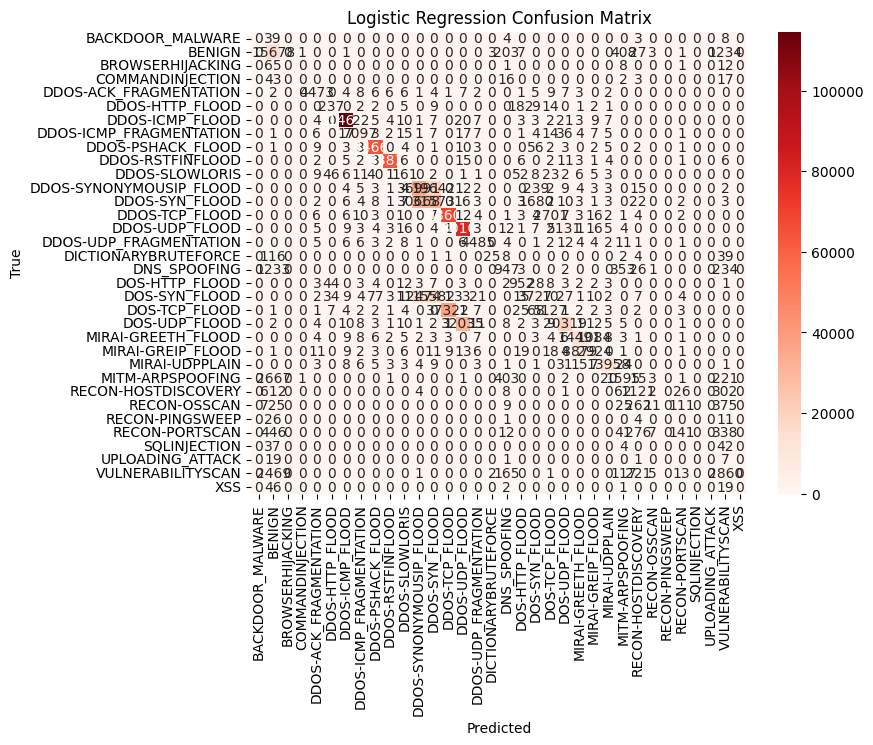

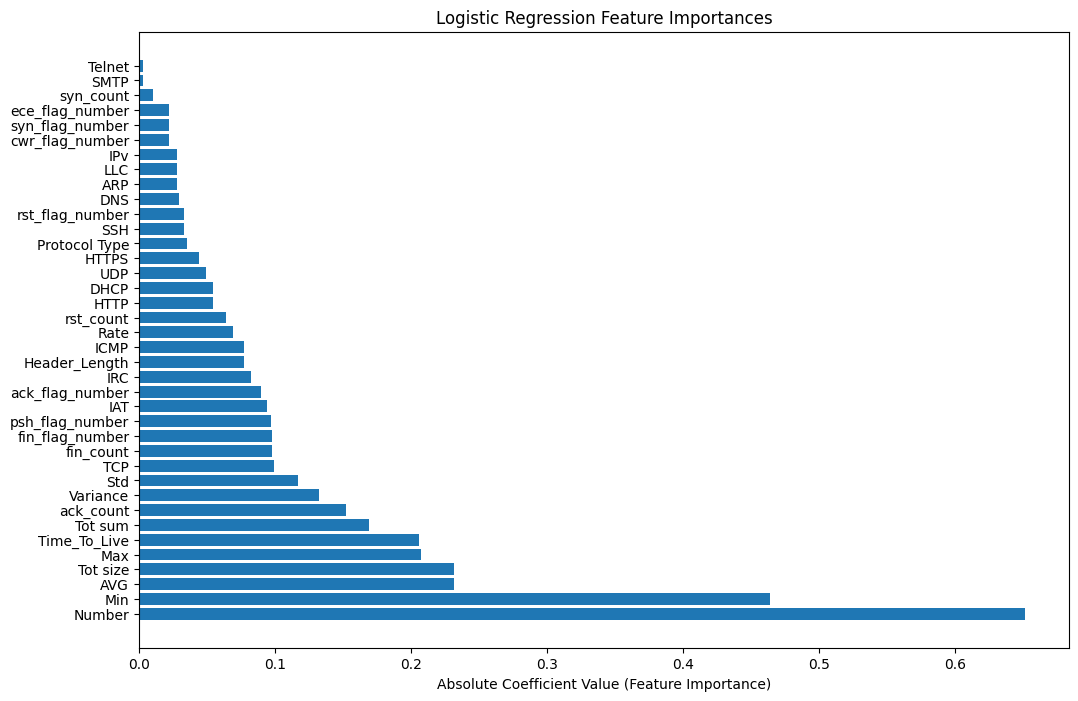

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Plotting Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, preds[0])  # preds[0] for the first (and only) model

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. Plotting Feature Importance for Logistic Regression
log_reg_model = ML_models[0]  # The Logistic Regression model
coefficients = log_reg_model.coef_[0]  # Coefficients for Logistic Regression

# Get the absolute values of coefficients to determine feature importance
importance = np.abs(coefficients)
indices = np.argsort(importance)[::-1]  # Sort the features by importance

plt.figure(figsize=(12, 8))
plt.title("Logistic Regression Feature Importances")
plt.barh(range(len(X_columns)), importance[indices], align="center")
plt.yticks(range(len(X_columns)), np.array(X_columns)[indices])
plt.xlabel("Absolute Coefficient Value (Feature Importance)")
plt.show()
